*SIO221a Notes - Alford and Gille*

*Reading: Bendat and Piersol Ch. 1, with a focus on sections 1.1 and 1.3.*

Concepts covered: Introduction, course expectations, programming 101, random variables, time series.

# Lecture 1

Welcome to SIOC 221A. This is the first in a 3-quarter sequence about data analysis in physical oceanography. The course is appropriate for first-year grad students, and it serves as an introduction to the basics of data analysis. Because we can’t cover all of data analysis in one quarter, we’ll focus this quarter on time series analysis (more on that later). This course is also your introduction to the scientific computing resources that are available to you at SIO, and we’ll spend
some time getting everyone up to speed on computing resources. First some basics.

**What happens in each of the three quarters of this course sequence?**

**SIOC 221A.** Time series analysis. We’ll build data analysis skills with an aim to understanding
Fourier transforms, spectral analysis, and how to interpret data using these tools.

**SIOC 221B**. Everything else. Random variables, matrix inversion, the details of least-squares
fitting, objective mapping, empirical orthogonal functions.

**SIOC 221C**. Laboratory class. Project-based examples to put the techniques of data analysis into
practice.

**What are the expectations for this course? See the syllabus.**
1. Weekly problem sets, which you may do collaboratively.
2. Midterm and final problem sets, which you MAY NOT do collaboratively. The final problem
set will be a bit broader than the others and will involve working through a data set that you
choose (or one suggested by your advisor) to test out the techniques that we explore in this
class. It will be somewhat open ended, and you’ll do a brief in-class presentation during our
final exam time slot.
3. Learning something new. Everyone starts this class with a different set of prior experiences.
Some of you are experienced programmers; others are new to Matlab. Take advantage of
this class to master a new skill (e.g. learn Matlab, learn python, learn version control throug
git hub, learn shell scripting). Respect everyone’s differing background.
4. Come to class and participate in discussion. Ask questions. Learn collaboratively.
5. Do assigned reading. Review course notes.
6. Most importantly: oceanography is a team sport.  Look around: these are your colleagues for years.  So in this class, **your job is everyone gets it.**

**What will we learn in this class?**

By the end of the course, you should come away with 

* more confidence in your programming (or confidence, if you have none now!)
* a solid understanding of time series analysis, the Fourier transform, and spectral methods.

Data analysis is at the heart of evidence-based decision making. This is what defines the
science that we do—all science in fact. Data analysis provides you with the tools to think about uncertainty, to allow you to be skeptical and to set limits on your skepticism.

**What should I read?** 

See the syllabus for some examples of excellent books that will help broaden
your understanding. The books are available on reserve. Course notes are fairly practical, but you want to come away from this course with enough knowledge to understand the notation when you need to consult a statistics book for a slightly more complicated topic. We’ll rely quite a bit on:

* Bendat and Piersol
* Emory and Thomson

## Getting started

Here are some resources we'll be using in the class.  To emphasize sharability and transparency in our science, let's use Jupyter notebooks (talk to me if this seems too daunting).  These are wonderful web interfaces that allow either Python or MATLAB kernels to be run interactively - showing the output while also allowing text and commenting to be put in an easy language called Markdown.  

Python users: please download a free Python installation.

MATLAB users: then, please follow the instructions for setting up a MATLAB version [here]( http://jmlilly.net/jupyter-matlab).

This file, and all of the notes and more than half of the lectures in this class, are MATLAB Jupyter notebooks (I'm learning Python and have tried to make a few using Python).  Enthusiastic Python users who would like to create a Python version of these notes: please see me!

Several textbooks have been placed on reserve.  Bendat and Piersol is on Canvas under "Files."

## Programming

Here's a little bit of programming.  We'll consider *for loops*, *while loops* and *if statements.*

In [1]:
N = 10
fs = [0] * N  # Initialize a list to hold the Fibonacci sequence

fs[0] = 1 #store value 1 into the 1st indice
fs[1] = 1 #store value 1 into the 2st indice

for c in range(2, N):
    fs[c] = fs[c - 1] + fs[c - 2]  #each of these numbers are the sum of the two 

# Show the answer
print(fs)  

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]


Now let's evaluate the "sum of squares" sequence $f(N)\equiv\sum_{i=1}^N i^2$.

In [2]:
#Now evaluate the sequence 
c = 0
while c < 9: #while loop, boolen expression (true or false) "when its not true stop doing stuff"
    fs[c + 1] = fs[c] + (c + 2)**2  # 
    c += 1 #update the index (need for a while loop!!)

# Show the answer
print(fs)

[1, 5, 14, 30, 55, 91, 140, 204, 285, 385]


In Python, it's a little easier than in MATLAB to follow best programming practices.  Still, in either language we will always want to do the following: 

1) make the code as followable by others as possible by 
    * structuring it in a sensible way and 
    * adding lots and lots of comments; 

2) use functions and scripts as often as possible; and 

3) following consistent guidelines for naming variables and functions; 

4) using version control, especially when sharing code with others. We'll use GitHub, and will get to this a little later.


In [4]:
#create a function and save it as sum_squares
def sum_squares(n):
    fs = [0] * n  # Initialize a list to hold the sequence
    fs[0] = 1**2  # **2 equals square

    c = 0
    while c < n - 1:
        fs[c + 1] = fs[c] + (c + 2)**2  
        c += 1

    return fs

# Call the function and show the result for n = 10
result = sum_squares(10)
print(result)

[1, 5, 14, 30, 55, 91, 140, 204, 285, 385]


It's OK that we get an error here - one would normally have a folder or set of nicely organized folders with our functions, named (in this case) sum_squares.m.

So now we can put the above code into a function.
Let's name it so we know it's ours, and also give it comments and a help line.

Here's the contents of the file mha_sum_squares_fcn.m:

~~~~
function fs=mha_sum_squares_fcn(n)
%function fs=mha_sum_squares_fcn(n)
%For an input n, return a vector of the sum of the first c squares, up to n.
%8/1/2022 Matthew Alford

fs=nan(1,n); %Make an array for the answer
c=1; %initialize an index
fs(1)=1.^2; %and initialize the first one.

%A while loop.
while c<n % Execute while c is less than n.
    fs(c+1)=fs(c)+(c+1).^2; %compute the next one and add it on.
    c=c+1; %increment the counter.
end
~~~~



In [4]:
#Now we can add it to our path:
#addpath('/Users/malford/GoogleDrive/Work/Projects/Teaching/sio221a/SIO221a_Github_code/') %You might need to modify this depending on your path and current directory
#which mha_sum_squares_fcn


In [5]:
# Call the function and show the result for n = 10
result = sum_squares(15)
print(result)

[1, 5, 14, 30, 55, 91, 140, 204, 285, 385, 506, 650, 819, 1015, 1240]


In [14]:
#in class 

#is prime 
#[0,1] IsPrime(n)
# is it is NOT prime return zero
# if it is prime return 1 
def IsPrime(n):
    i = 2
    while i < n/2:
        if n % i == 0: # % if the remainder of n/i is 0 then return a 0 
            return 0 
        i += 1 
    return 1 
print(IsPrime(11))

    

1


In Python, and to a lesser degree MATLAB, *object-oriented programming* is strongly encouraged.  This practice, used in "real" languages such as C++, abstracts both functions, called methods, and data into objects that are called classes.  Then one can *derive* specialized subclasses from more generic parent classes, resulting in highly reusable and elegant code. 

This is beyond the scope of this course, but I recommend learning more about it if you are interested.  For the purposes of our course, I recommend at least using *structures* to store related data:

In [ ]:
#OK, but confusing and error prone if you are working with another person whose code
#includes variables of the same name:
lat=35;
lon=180;
depth=2000;

#Better!  Define a station class or structure.
station.lat=35;
station.lon=180;
station.depth=2000;

#Then (bonus!) Python and MATLAB (in a clunkier way) allow one to define all sorts of common
#routines that might be used on stations, reducing code.

### **Why study data analysis?**

In August 2016, the following message was posted to all-at-sio:

*Last Saturday morning, the surface water temperature off La Jolla Shores was 77$^\circ$F.
This morning, it’s 63$^\circ$F. These are dive computer temperatures, so I went to check the CORDC gauges online,
but it looks like those temperatures gauges are offline? Same with SCCOOS... but
maybe those are pulling data from the same gauges? Are there any SIO sea surface
temperature gauges currently online-to show us the last week or two?
My dive buddy’s theory was that this morning we were diving in the middle of a big
incoming tide (note the full moon) and that was causing a lot of mixing of deeper water
and explained the huge drop in sea surface temperature. I was skeptical.
So who’s right? Do big tidal flows cause lower sea surface temperatures?
And what in the world caused this 14$^\circ$F drop in six days???**

You might be wondering about a couple of acroyms. CORDC is the Coastal Observing Research
and Development Center (based at SIO) and SCCOOS is the Southern California Coastal Observing System. And you might also feel like we should use the metric system for temperature. Here
77$^\circ$F = 25$^\circ$C, and 63$^\circ$F = 17.2$^\circ$C, so the temperature drop was 7.8$^\circ$C. The post raises a number of issues for us as analyzers of physical oceanograpic data. Here are some possible questions?

1. What’s going on with the data sources? What should they provide, and why did the posters find that the observations were not available?
2. What data do we trust? How reliable is a dive computer and how does dive computer accuracy compare with pier sensor accuracy?
3. What is the typical temperature at the Scripps pier? And what is a typical range of variability? Is this event unusual?
4. What are the mechanisms behind this change? How much confidence do we have in our assessment of the mechanisms?

So having posed a set of questions, what do we do now? Figuring out what to do next is the goal
for this class, and in general for your courses in physical oceanographic data analysis.

### What is a time series?
Let’s start by looking at some time series examples from the Scripps Pier. 

Simply put, a time series is a one-dimensional data set that we can represent as a vector. For
example, we can look at data collected at a single point and ask how they vary over time. 

Sometimes time series are not collected at a single point. We might examine the time series collected
by an eXpendable BathyThermograph (XBT) as it free falls into the ocean. Officially an XBT
makes measurements as a function of depth, but the engineering variables typically sample at a
fixed sampling rate (e.g. 5 Hz), which means it can be useful to think of the data as a time series.

And sometimes we use the methods of time-series analysis to look at spatial records. Instead of asking about temporal variability (or variability in frequency space) we ask about spatial
variability (or variability in wavenumber.)

### Introduction to real data

In [1]:
import netCDF4 as nc
import numpy as np
from datetime import datetime, timedelta

# URL or local file path
file = 'http://sccoos.org/thredds/dodsC/autoss/scripps_pier-2020.nc'
# If you have a local file, use this:
# file = '/Users/malford/GoogleDrive/Work/Projects/Teaching/sio221a/FromSarah/homework_2021/data/scripps_pier-2020.nc'

# Accessing data
with nc.Dataset(file, 'r') as dataset:
    time = dataset.variables['time'][:]
    temperature = dataset.variables['temperature'][:]
    pressure = dataset.variables['pressure'][:]

# Convert time from seconds to datetime
reference_date = datetime(1970, 1, 1)
time_in_datetime = [reference_date + timedelta(seconds=int(d)) for d in time]




In [2]:
# Access metadata and variable attributes
with nc.Dataset(file, 'r') as dataset:
    # Access metadata
    print("Attributes for the first variable:")
    print(dataset.variables.keys())  # Print variable names

    # Access attributes of the first variable
    first_variable_attrs = dataset.variables[list(dataset.variables.keys())[0]].__dict__
    print("Attributes of the first variable:")
    print(first_variable_attrs)

    # Alternatively, you can use ncattrs() to access global attributes
    print("Global attributes:")
    print(dataset.ncattrs())

# To display variable information, you can use the `ncdump` function in netCDF4
print("\nVariable information (similar to ncdisp in MATLAB):")
ncdump = nc.Dataset(file, 'r')
print(ncdump)

Attributes for the first variable:
dict_keys(['time', 'temperature', 'conductivity', 'pressure', 'salinity', 'chlorophyll_raw', 'chlorophyll', 'temperature_flagPrimary', 'temperature_flagSecondary', 'conductivity_flagPrimary', 'conductivity_flagSecondary', 'pressure_flagPrimary', 'pressure_flagSecondary', 'salinity_flagPrimary', 'salinity_flagSecondary', 'chlorophyll_flagPrimary', 'chlorophyll_flagSecondary', 'sigmat', 'diagnosticVoltage', 'currentDraw', 'aux1', 'aux3', 'aux4', 'instrument1', 'instrument2', 'platform1', 'station', 'lat', 'lon', 'depth', 'crs'])
Attributes of the first variable:
{'comment': 'also known as Epoch or Unix time', 'platform': 'platform1', 'long_name': 'time', 'standard_name': 'time', 'units': 'seconds since 1970-01-01 00:00:00 UTC', 'calendar': 'julian', 'axis': 'T', '_ChunkSizes': 1024}
Global attributes:
['_NCProperties', 'comment', 'platform_vocabulary', 'time_coverage_resolution', 'geospatial_vertical_max', 'geospatial_bounds_crs', 'geospatial_bounds_ver

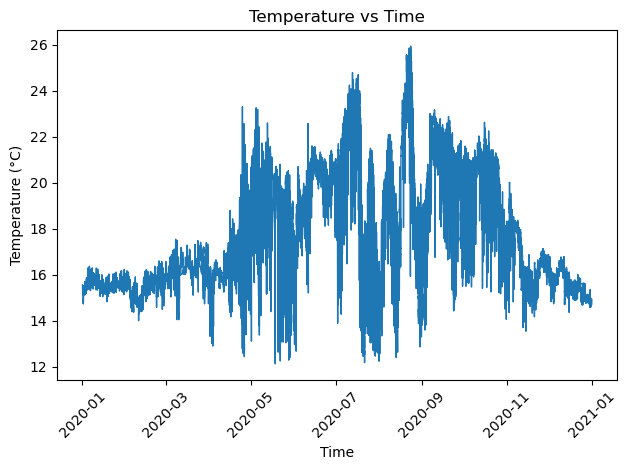

In [3]:
# Plotting

import matplotlib.pyplot as plt
plt.plot(time_in_datetime, temperature, linewidth=1)
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Temperature vs Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

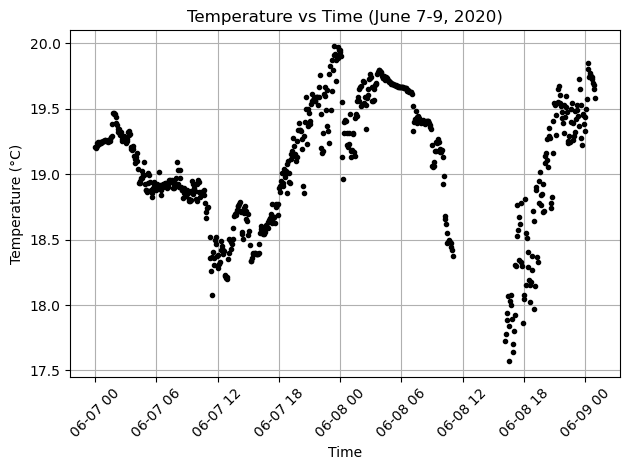

In [4]:
# Define the time range to zoom in
start_date = datetime(2020, 6, 7, 0, 0, 0)
end_date = datetime(2020, 6, 9, 1, 1, 1)

# Find indices for the specified time range
i1 = np.where((np.array(time_in_datetime) > start_date) & (np.array(time_in_datetime) < end_date))[0]

# Plotting
plt.figure()
plt.plot(np.array(time_in_datetime)[i1], temperature[i1], 'k.')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Temperature vs Time (June 7-9, 2020)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

Data analysis gives us a host of tools for building insights into data.  A good rule of thumb is that data analysis can *sometimes* tell us things our eyes can't see about the data.  Machine learning (out of scope for this course) can tell us *amazing* things.  But still, the "can I see it with my own eyes in the raw data?" is a great sanity check.

What do you see in the data?

Let's also explore a few aspects of real data.  Ocean data is often messy, spiky, gappy, nonlinear and generally confusing!

Time Difference in Minutes [4.0000001  3.99999993 4.0000001  ... 3.99999993 4.0000001  3.99999993]


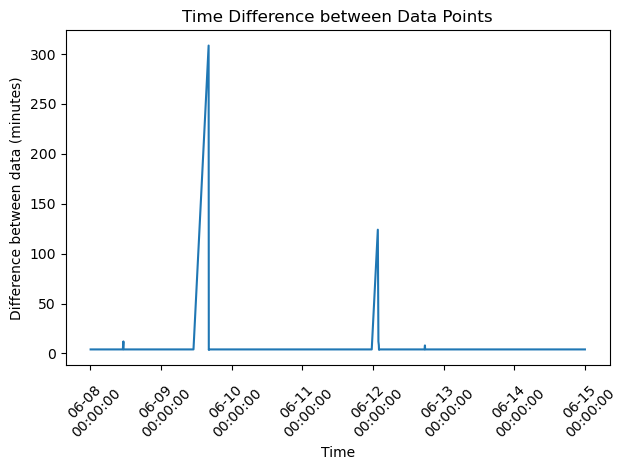

In [5]:

# Assuming you have the 'time' array from earlier

# Convert time from seconds to datetime
date0 = datetime(1970, 1, 1)
dnum = np.array(time) / 3600 / 24 + date0.toordinal()

# Zoom in on a shorter period
start_date = datetime(2020, 6, 7, 0, 0, 0)
end_date = datetime(2020, 6, 14, 1, 1, 1)
i1 = np.where((dnum > start_date.toordinal()) & (dnum < end_date.toordinal()))[0]

# Compute the time difference in minutes
time_diff_minutes = np.diff(dnum[i1]) * 24 * 60

print("Time Difference in Minutes",time_diff_minutes )

# Plotting
fig, ax = plt.subplots()
ax.plot(dnum[i1][1:], time_diff_minutes)
ax.set_xlabel('Time')
ax.set_ylabel('Difference between data (minutes)')
ax.set_title('Time Difference between Data Points')

# Set a fixed date format for x-axis (e.g., "%m-%d %H:%M:%S")
date_format = "%m-%d\n%H:%M:%S"
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter(date_format))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
dnum

array([737425.00037037, 737425.00314815, 737425.00592593, ...,
       737790.9927662 , 737790.99554398, 737790.99832176])

### Random data - an introduction

Now that we've had a first look at some data, let's get into some concepts.  Bendat and Piersol talk about random variables.  What is a random variable?  

Think of a "population" of possible outcomes such as the roll of a pair of dice.  We like to think of each "realization" or roll as independent from the others.  We can then apply some basic statistics to these such as the mean, $\mu$, and the standard deviation, $\sigma$.  Without an infinite number of rolls, knowing these quantities perfectly is impossible; hence we will have to estimate them from the samples we have; the so-called sample mean and sample variance.  If we're careful, we can make estimators that are unbiased relative to the true quantities.

We'll get into how we estimate these in a moment; for now though, the real situation with real world data is actually a little worse.  We usually have "time series" or spatial data which we treat as if they are random variables.  By that I mean we treat each measurement in time as if it were an independent realization of an ensmble or population.  But in reality, what we really would want is an infinite number of measurements of the ocean at a particular time and place (i.e., an infinite number of parallel universes).  Since that sounds kind of impractical, we deal with what we have, assuming the time series is *stationary* (its statistics do not depend on time) and *ergodic* (a representative sample of the ensemble).


We'll next look at pressure, which is essentially the hydrostatic pressure of the seawater column.  If we express it in decibars, is very close to the sea level in meters.

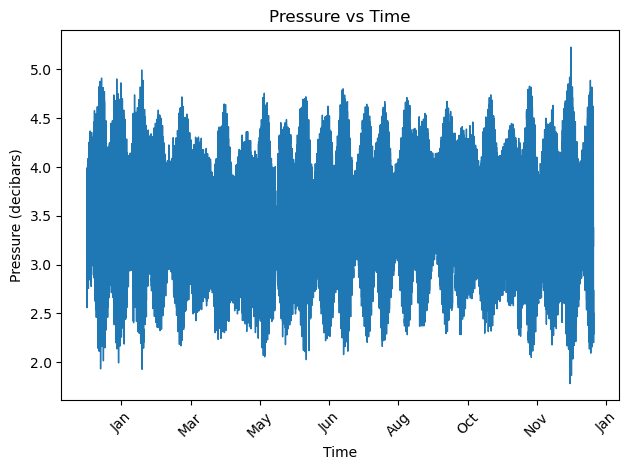

In [6]:
# Plotting pressure against time
plt.plot(dnum, pressure, linewidth=1)
plt.xlabel('Time')
plt.ylabel('Pressure (decibars)')
plt.title('Pressure vs Time')

# Set a specific date format for x-axis (e.g., "%b" for month abbreviation)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show() 
#this shows the spring tide periods

Text(0.5, 1.0, 'Pressure vs Time (June 1 - June 3, 2020)')

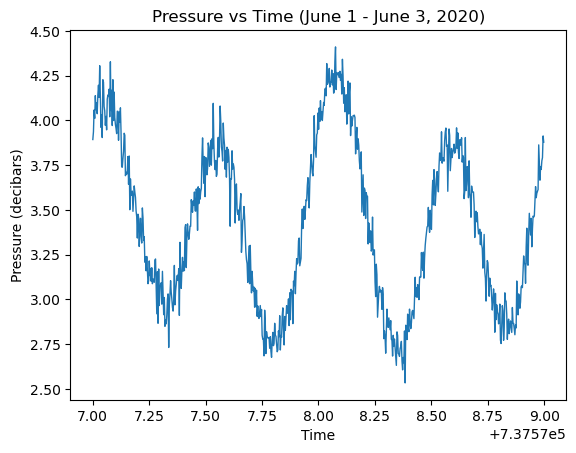

In [9]:
# Define the date range (June 1 to June 3, 2020)
start_date = datetime(2020, 6, 1, 0, 0, 0)
end_date = datetime(2020, 6, 3, 1, 1, 1)
i1 = np.where((dnum > start_date.toordinal()) & (dnum < end_date.toordinal()))[0]

# Plotting pressure for the specified date range
plt.plot(dnum[i1], pressure[i1], linewidth=1)
plt.xlabel('Time')
plt.ylabel('Pressure (decibars)')
plt.title('Pressure vs Time (June 1 - June 3, 2020)')


Is this a deterministic or a random variable??

Next time, we'll continue with this and try to see what else we can learn from the data.

In [8]:
time_in_datetime

[datetime.datetime(2020, 1, 1, 0, 0, 32),
 datetime.datetime(2020, 1, 1, 0, 4, 32),
 datetime.datetime(2020, 1, 1, 0, 8, 32),
 datetime.datetime(2020, 1, 1, 0, 12, 32),
 datetime.datetime(2020, 1, 1, 0, 16, 32),
 datetime.datetime(2020, 1, 1, 0, 20, 32),
 datetime.datetime(2020, 1, 1, 0, 24, 32),
 datetime.datetime(2020, 1, 1, 0, 28, 32),
 datetime.datetime(2020, 1, 1, 0, 32, 32),
 datetime.datetime(2020, 1, 1, 0, 36, 32),
 datetime.datetime(2020, 1, 1, 0, 40, 32),
 datetime.datetime(2020, 1, 1, 0, 44, 32),
 datetime.datetime(2020, 1, 1, 0, 48, 32),
 datetime.datetime(2020, 1, 1, 0, 52, 32),
 datetime.datetime(2020, 1, 1, 0, 56, 32),
 datetime.datetime(2020, 1, 1, 1, 0, 32),
 datetime.datetime(2020, 1, 1, 1, 4, 32),
 datetime.datetime(2020, 1, 1, 1, 8, 32),
 datetime.datetime(2020, 1, 1, 1, 12, 32),
 datetime.datetime(2020, 1, 1, 1, 16, 32),
 datetime.datetime(2020, 1, 1, 1, 20, 32),
 datetime.datetime(2020, 1, 1, 1, 24, 32),
 datetime.datetime(2020, 1, 1, 1, 28, 32),
 datetime.datetim